#### Import Modules

In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import cross_val_score

import sys
sys.path.append("../")

from scripts.modeling_utils import run_train_pipeline, get_pipeline, dvc_get_data

import os
import mlflow

### Cleaned Data (v2 on dvc)

#### Reading Cleaned Data Version Using DVC

In [5]:
df = dvc_get_data(path='data/AdSmartABdata.csv', 
                version='v2', experiment_name="Cleaned Data")
df = df.drop(columns=['Unnamed: 0'])
df.info()

Traceback (most recent call last):
  File "/home/n/anaconda3/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 270, in list_experiments
    experiment = self._get_experiment(exp_id, view_type)
  File "/home/n/anaconda3/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 394, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/home/n/anaconda3/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 1049, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/home/n/anaconda3/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 1042, in _read_helper
    result = read_yaml(root, file_name)
  File "/home/n/anaconda3/lib/python3.9/site-packages/mlflow/utils/file_utils.py", line 181, in read_yaml
    raise MissingConfigException("Yaml file '%s' does not exist." % file_path)
mlflow.exceptions.MissingConfigException: Yaml file '/ho

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experiment   1243 non-null   object
 1   hour         1243 non-null   int64 
 2   platform_os  1243 non-null   int64 
 3   browser      1243 non-null   object
 4   day_of_week  1243 non-null   object
 5   brand        1243 non-null   object
 6   response     1243 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 68.1+ KB


#### Logistic Regression on Cleaned Data

In [5]:
try:
    mlflow.end_run()
except:
    pass

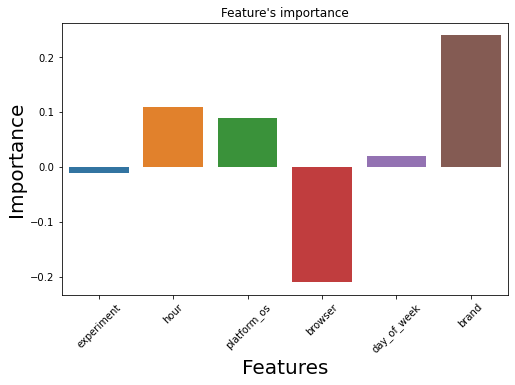

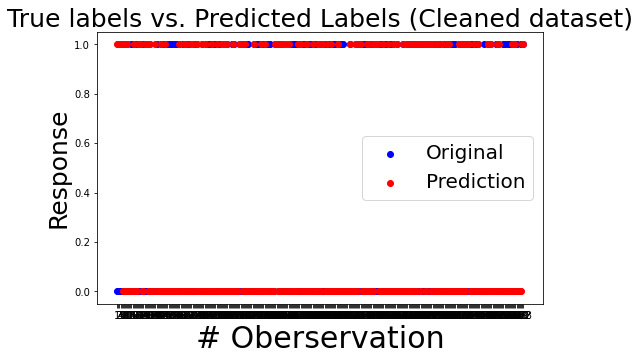

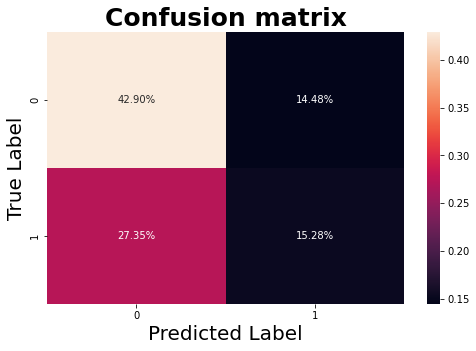

{'accuracy': 0.58, 'precision': 0.51, 'recall': 0.36, 'entropy': 0.68, 'true_pos': 160, 'true_neg': 57, 'false_pos': 54, 'false_neg': 102}
{'experiment': -0.01, 'hour': 0.11, 'platform_os': 0.09, 'browser': -0.21, 'day_of_week': 0.02, 'brand': 0.24}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


/home/n/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Cleaned dataset_Logistic regression_Thu-Sep--1-09:48:41-2022'.
2022/09/01 09:48:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned dataset_Logistic regression_Thu-Sep--1-09:48:41-2022, version 1
Created version '1' of model 'Cleaned dataset_Logistic regression_Thu-Sep--1-09:48:41-2022'.


Run - Logistic regression is logged to Experiment - Cleaned dataset


In [6]:

X = df.drop(columns=['response'])
y = df['response'].values
model = LogisticRegression()
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned dataset',
                run_name='Logistic regression')

mlflow.end_run()

#### Tuning Parameters

`We will tune C, penalty, solver parameters for Logistic regression and store the model`

In [7]:
try:
    mlflow.end_run()
except:
    pass

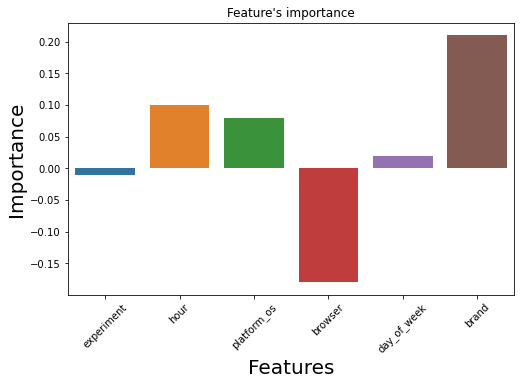

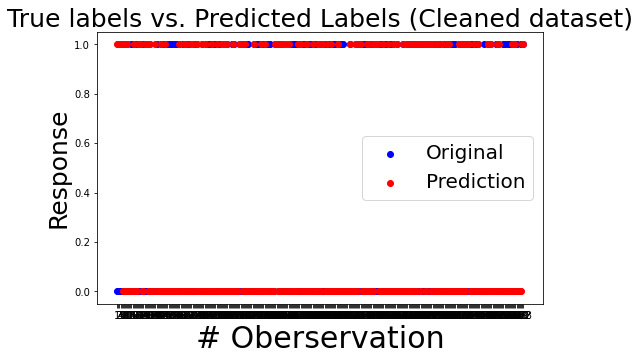

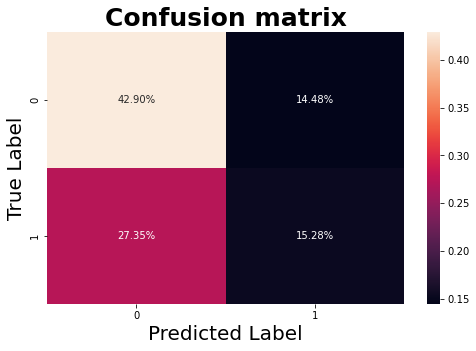

{'accuracy': 0.58, 'precision': 0.51, 'recall': 0.36, 'entropy': 0.68, 'true_pos': 160, 'true_neg': 57, 'false_pos': 54, 'false_neg': 102}
{'experiment': -0.01, 'hour': 0.1, 'platform_os': 0.08, 'browser': -0.18, 'day_of_week': 0.02, 'brand': 0.21}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned dataset_Logistic regression tunned on C=0.1  penalty='l2', and solver='newton-cg'_Sat-Sep--3-20:38:42-2022'.
2022/09/03 20:38:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned dataset_Logistic regression tunned on C=0.1  penalty='l2', and solver='newton-cg'_Sat-Sep--3-20:38:42-2022, version 1
Created version '1' of model 'Cleaned dataset_Logistic regression tunned on C=0.1  penalty='l2', and solver='newton-cg'_Sat-Sep--3-20:38:42-2022'.


Run - Logistic regression tunned on C=0.1  penalty='l2', and solver='newton-cg' is logged to Experiment - Cleaned dataset


In [9]:
"""
Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
Regularization (penalty) can sometimes be helpful.

penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.

C in [100, 10, 1.0, 0.1, 0.01]

"""
X = df.drop(columns=['response'])
y = df['response'].values
model = LogisticRegression(C=0.1, penalty='l2', solver='newton-cg')
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned dataset',
                run_name="Logistic regression tunned on C=0.1  penalty='l2', and solver='newton-cg'")

mlflow.end_run()

`We will try C=1 and solver=lbfgs`

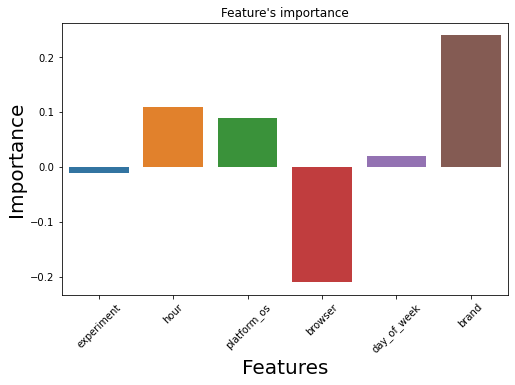

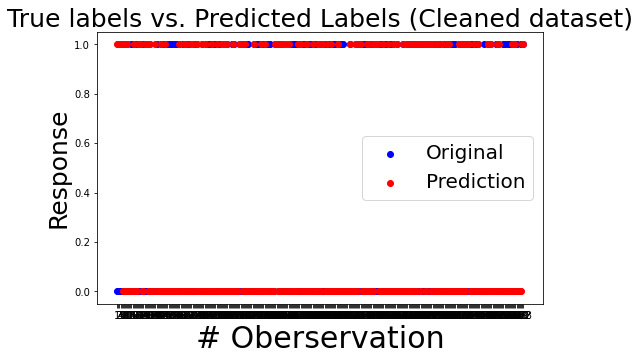

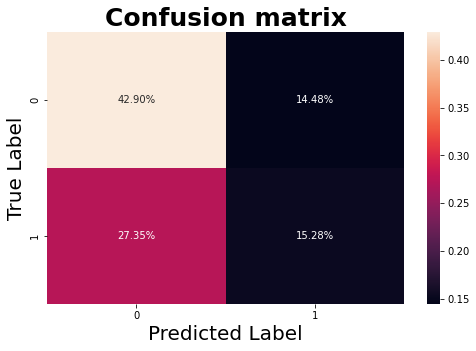

{'accuracy': 0.58, 'precision': 0.51, 'recall': 0.36, 'entropy': 0.68, 'true_pos': 160, 'true_neg': 57, 'false_pos': 54, 'false_neg': 102}
{'experiment': -0.01, 'hour': 0.11, 'platform_os': 0.09, 'browser': -0.21, 'day_of_week': 0.02, 'brand': 0.24}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned dataset_Logistic regression tunned on C=1  penalty='l2', and solver='lbfgs'_Sat-Sep--3-20:39:51-2022'.
2022/09/03 20:39:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned dataset_Logistic regression tunned on C=1  penalty='l2', and solver='lbfgs'_Sat-Sep--3-20:39:51-2022, version 1
Created version '1' of model 'Cleaned dataset_Logistic regression tunned on C=1  penalty='l2', and solver='lbfgs'_Sat-Sep--3-20:39:51-2022'.


Run - Logistic regression tunned on C=1  penalty='l2', and solver='lbfgs' is logged to Experiment - Cleaned dataset


In [10]:
model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned dataset',
                run_name="Logistic regression tunned on C=1  penalty='l2', and solver='lbfgs'")

mlflow.end_run()

`More interactive tunning will be available in the dashboard`

#### RandomForestClassifier on the Cleaned Data 

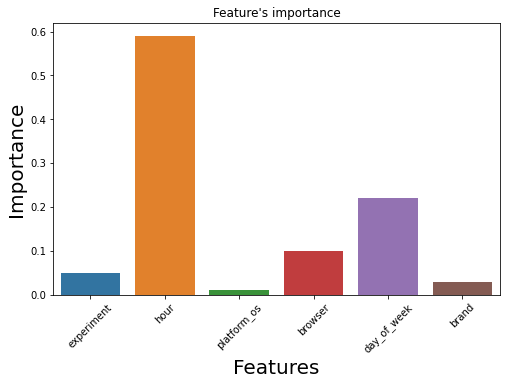

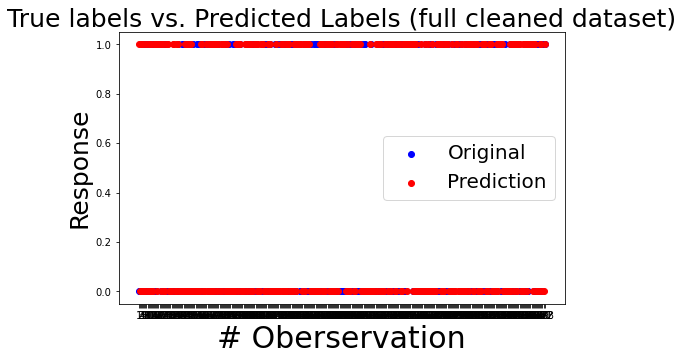

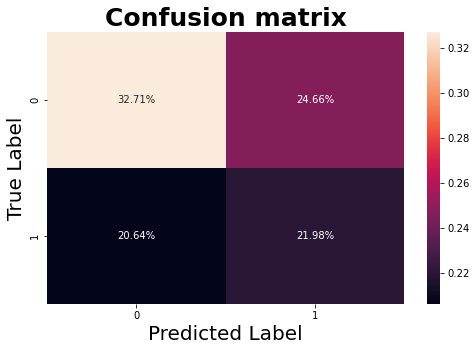

{'accuracy': 0.55, 'precision': 0.47, 'recall': 0.52, 'entropy': 0.96, 'true_pos': 122, 'true_neg': 82, 'false_pos': 92, 'false_neg': 77}
{'experiment': 0.05, 'hour': 0.59, 'platform_os': 0.01, 'browser': 0.1, 'day_of_week': 0.22, 'brand': 0.03}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:49:11-2022'.
2022/09/01 09:49:20 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:49:11-2022, version 1
Created version '1' of model 'full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:49:11-2022'.


Run - depth 20 random forest is logged to Experiment - full cleaned dataset


In [7]:
model = RandomForestClassifier(max_depth=20)
run_train_pipeline(model, X, y, 
                experiment_name='full cleaned dataset',
                run_name='depth 20 random forest')
mlflow.end_run()

`We will tune RandomForestClassifier based on max_features and n_estimators`

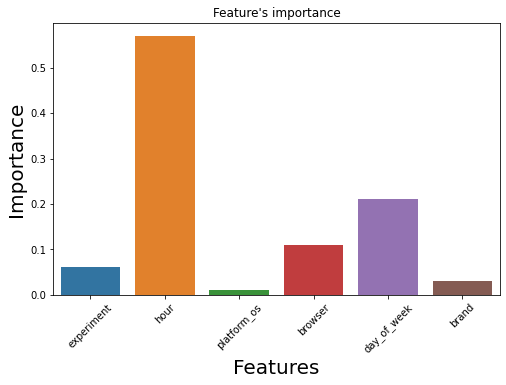

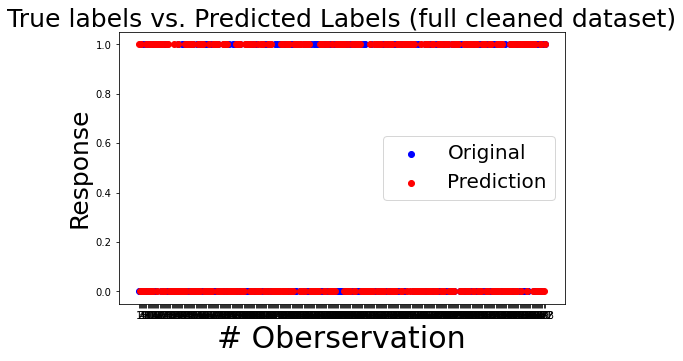

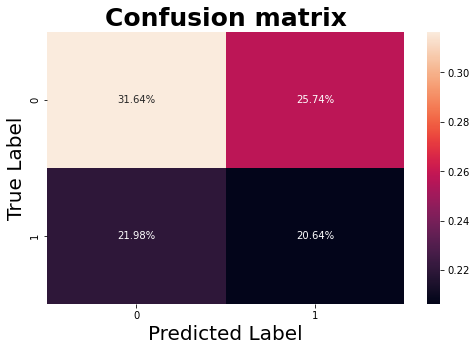

{'accuracy': 0.52, 'precision': 0.45, 'recall': 0.48, 'entropy': 2.25, 'true_pos': 118, 'true_neg': 77, 'false_pos': 96, 'false_neg': 82}
{'experiment': 0.06, 'hour': 0.57, 'platform_os': 0.01, 'browser': 0.11, 'day_of_week': 0.21, 'brand': 0.03}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'full cleaned dataset_depth 20 random forest tuned on max_features='sqrt', and n_estimators=10_Sat-Sep--3-20:44:04-2022'.
2022/09/03 20:44:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_depth 20 random forest tuned on max_features='sqrt', and n_estimators=10_Sat-Sep--3-20:44:04-2022, version 1
Created version '1' of model 'full cleaned dataset_depth 20 random forest tuned on max_features='sqrt', and n_estimators=10_Sat-Sep--3-20:44:04-2022'.


Run - depth 20 random forest tuned on max_features='sqrt', and n_estimators=10 is logged to Experiment - full cleaned dataset


In [11]:
"""
The most important parameter is the number of random features to sample at each split point (max_features).

You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features.

max_features [1 to 20]
Alternately, you could try a suite of different default value calculators.

max_features in [‘sqrt’, ‘log2’]
Another important parameter for random forest is the number of trees (n_estimators).

Ideally, this should be increased until no further improvement is seen in the model.

Good values might be a log scale from 10 to 1,000.

n_estimators in [10, 100, 1000]
"""
model = RandomForestClassifier(max_depth=20,max_features='sqrt', n_estimators=10)
run_train_pipeline(model, X, y, 
                experiment_name='full cleaned dataset',
                run_name="depth 20 random forest tuned on max_features='sqrt', and n_estimators=10")
mlflow.end_run()

`We will now tune by max_features='log2', n_estimators=200`

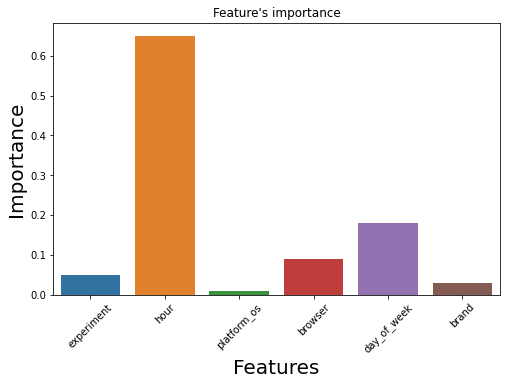

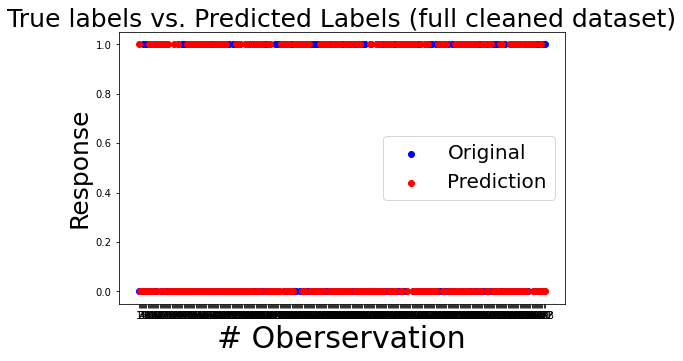

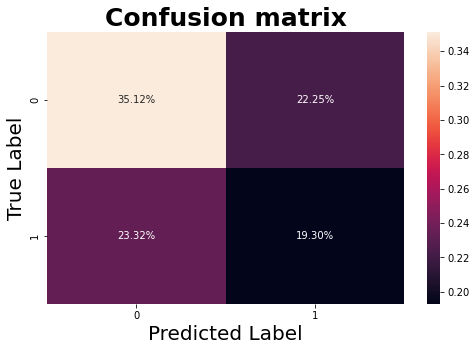

{'accuracy': 0.54, 'precision': 0.46, 'recall': 0.45, 'entropy': 2.49, 'true_pos': 131, 'true_neg': 72, 'false_pos': 83, 'false_neg': 87}
{'experiment': 0.05, 'hour': 0.65, 'platform_os': 0.01, 'browser': 0.09, 'day_of_week': 0.18, 'brand': 0.03}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'full cleaned dataset_depth 20 random forest tuned on max_features='log2', and n_estimators=200_Sat-Sep--3-20:46:47-2022'.
2022/09/03 20:46:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_depth 20 random forest tuned on max_features='log2', and n_estimators=200_Sat-Sep--3-20:46:47-2022, version 1
Created version '1' of model 'full cleaned dataset_depth 20 random forest tuned on max_features='log2', and n_estimators=200_Sat-Sep--3-20:46:47-2022'.


Run - depth 20 random forest tuned on max_features='log2', and n_estimators=200 is logged to Experiment - full cleaned dataset


In [12]:
model = RandomForestClassifier(max_depth=20,max_features='sqrt', n_estimators=10)
run_train_pipeline(model, X, y, 
                experiment_name='full cleaned dataset',
                run_name="depth 20 random forest tuned on max_features='log2', and n_estimators=200")
mlflow.end_run()

#### XGBoost on the Cleaned Data

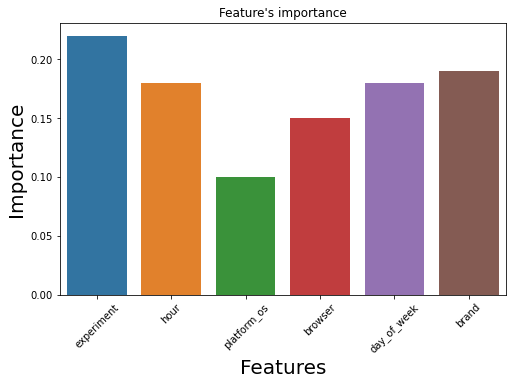

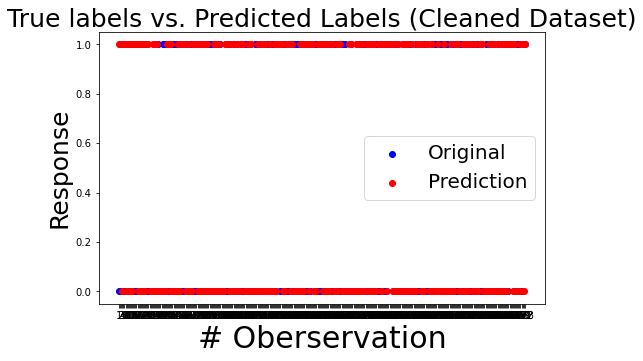

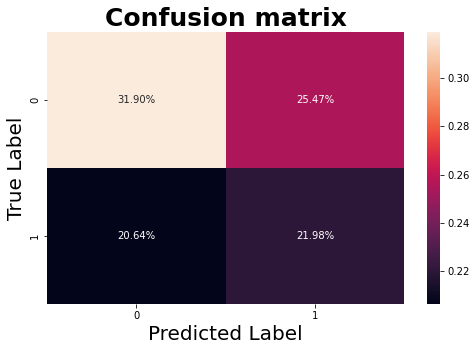

{'accuracy': 0.54, 'precision': 0.46, 'recall': 0.52, 'entropy': 0.86, 'true_pos': 119, 'true_neg': 82, 'false_pos': 95, 'false_neg': 77}
{'experiment': 0.22, 'hour': 0.18, 'platform_os': 0.1, 'browser': 0.15, 'day_of_week': 0.18, 'brand': 0.19}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:49:48-2022'.
2022/09/01 09:49:58 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:49:48-2022, version 1
Created version '1' of model 'Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:49:48-2022'.


Run - XGBoost Classifier is logged to Experiment - Cleaned Dataset


In [8]:
model = XGBClassifier()
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned Dataset',
                run_name='XGBoost Classifier')
mlflow.end_run()


`We will tune XGBClassifier based on eta(Learing Rate), and max_depth`

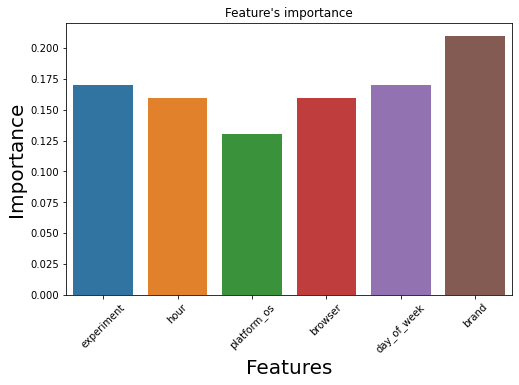

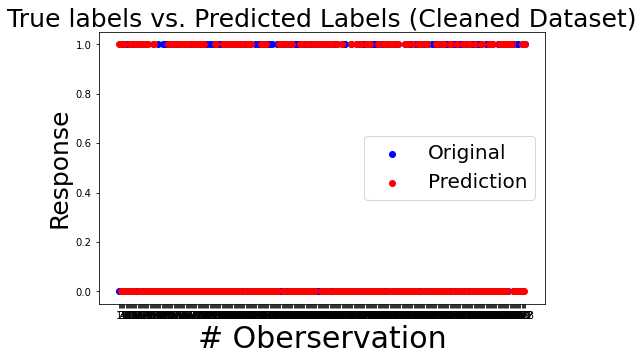

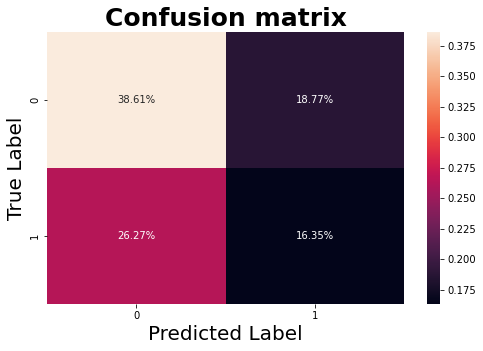

{'accuracy': 0.55, 'precision': 0.47, 'recall': 0.38, 'entropy': 0.69, 'true_pos': 144, 'true_neg': 61, 'false_pos': 70, 'false_neg': 98}
{'experiment': 0.17, 'hour': 0.16, 'platform_os': 0.13, 'browser': 0.16, 'day_of_week': 0.17, 'brand': 0.21}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned Dataset_XGBoost Classifier tuned on eta=0.01, and max_depth=9_Sat-Sep--3-21:15:30-2022'.
2022/09/03 21:15:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned Dataset_XGBoost Classifier tuned on eta=0.01, and max_depth=9_Sat-Sep--3-21:15:30-2022, version 1
Created version '1' of model 'Cleaned Dataset_XGBoost Classifier tuned on eta=0.01, and max_depth=9_Sat-Sep--3-21:15:30-2022'.


Run - XGBoost Classifier tuned on eta=0.01, and max_depth=9 is logged to Experiment - Cleaned Dataset


In [14]:

model = XGBClassifier(eta=0.01, max_depth=9)
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned Dataset',
                run_name="XGBoost Classifier tuned on eta=0.01, and max_depth=9")
mlflow.end_run()

`Since we have small sample size it hard to differentiate effects of hypertunning the parameters`
`It Only has a slight change on Accuracy and precision`